In [1]:
import pandas as pd
import sklearn.tree
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
#import dtreeviz.trees as dtv # importowanie dtreeviz
from sklearn.model_selection import GridSearchCV
#from dtreeviz.trees import *

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt 

from sklearn.metrics import make_scorer

#import graphviz

from sklearn.metrics import fbeta_score


from sklearn.model_selection import cross_val_score,  StratifiedKFold
from sklearn.metrics import f1_score

In [2]:
train_df=pd.read_csv("D:/STUDIA/ROK_II/Magisterka/Modele/Dane pierwotne/Dane_do_uczenia_T.csv", encoding="utf-8")
del train_df['Unnamed: 0']

In [3]:
train_df

,ENSG00000168779.18,ENSG00000043355.9,ENSG00000139800.8,ENSG00000095752.5,ENSG00000114270.14,ENSG00000143320.7,ENSG00000104112.7,ENSG00000168703.5,ENSG00000116176.6,ENSG00000188523.7,...,ENSG00000104755.13,ENSG00000250256.1,ENSG00000259447.1,ENSG00000235864.1,ENSG00000227718.1,ENSG00000229370.1,ENSG00000254434.1,ENSG00000233146.1,ENSG00000251969.3,scale
0,6.418540,2.139513,2.139513,9.984396,139.068370,134.076172,11.410738,67.038086,173.300584,16.402936,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.426342,0.713171,0.000000,T1
1,4.254904,0.850981,0.000000,0.850981,45.101982,22.125501,84.247098,1.701962,11.913731,5.956866,...,0.850981,0.000000,0.850981,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T1
2,1.931528,0.643843,0.000000,40.562078,452.621281,237.577884,6.438425,0.000000,16.096063,3.219213,...,0.000000,0.000000,0.643843,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T1
3,0.870129,0.000000,0.000000,123.558325,773.544728,262.778974,15.662323,2.610387,70.480453,1.740258,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.870129,T1
4,2.718041,2.718041,2.718041,39.411591,145.415179,88.336324,19.026285,1167.398495,16.308244,16.308244,...,1.359020,0.000000,1.359020,1.359020,1.359020,0.0,0.000000,0.000000,0.000000,T1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,12.991861,2.362157,0.000000,1.181078,242.121051,54.329602,11.810783,3.543235,120.469986,1.181078,...,1.181078,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T3
951,9.498885,0.527716,0.000000,6.332590,184.172817,132.984384,8.971169,0.527716,26.913506,6.860306,...,0.527716,1.055432,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T3
952,0.000000,0.000000,0.000000,0.000000,434.417898,118.161668,159.865787,152.915100,28.961193,77.615998,...,0.000000,0.000000,0.000000,1.158448,0.000000,0.0,0.000000,0.000000,0.000000,T3
953,24.591858,16.394572,0.000000,21.859430,1153.084920,2191.407833,13.662144,5.464857,360.680591,0.000000,...,0.000000,8.197286,0.000000,0.000000,2.732429,0.0,0.000000,0.000000,0.000000,T3


In [4]:
y=train_df['scale']
del train_df['scale']

In [5]:
zestaw_caly = np.array(train_df)
caly_label = np.array(y)


In [6]:
ftwo_scorer = make_scorer(f1_score,greater_is_better=True, average='macro')

## Dobieranie part 1

In [8]:
param_grid = {
    'min_samples_split':range(2,6,2), #
    'min_samples_leaf': range(2,30,5),     #
    'max_leaf_nodes':range(2,30,5), #
    'max_depth':list(range(2, 20,4)), #
    'n_estimators':[100,500] #
}

In [9]:
Grb_1 = GradientBoostingClassifier(random_state=42)
grid_search_2 = GridSearchCV(estimator = Grb_1, param_grid = param_grid, 
                          cv = 5, n_jobs = 4, verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))


Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=4,
             param_grid={'max_depth': [2, 6, 10, 14, 18],
                         'max_leaf_nodes': range(2, 30, 5),
                         'min_samples_leaf': range(2, 30, 5),
                         'min_samples_split': range(2, 6, 2),
                         'n_estimators': [100, 500]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [10]:
grid_search_2.best_score_#0.11579231045634207

0.5040395128315593

In [11]:
grid_search_2.best_params_

{'max_depth': 6,
 'max_leaf_nodes': 12,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 500}

## Dobieranie part 2

In [7]:
param_grid = {
    'min_samples_split':range(2,4,1), 
    'min_samples_leaf': range(4,13,1),     
    'max_leaf_nodes':range(9,15,1), # 
    'max_depth':range(4, 9,1),  #
    'n_estimators':[500] 
}

In [8]:
Grb_1 = GradientBoostingClassifier(random_state=42)
grid_search_2 = GridSearchCV(estimator = Grb_1, param_grid = param_grid, 
                          cv = 5, n_jobs = 4, verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))


Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=4,
             param_grid={'max_depth': range(4, 9),
                         'max_leaf_nodes': range(9, 15),
                         'min_samples_leaf': range(4, 13),
                         'min_samples_split': range(2, 4),
                         'n_estimators': [500]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [9]:
grid_search_2.best_estimator_

GradientBoostingClassifier(max_depth=5, max_leaf_nodes=11, min_samples_leaf=11,
                           n_estimators=500, random_state=42)

In [10]:
grid_search_2.best_score_

0.5107179520638822

In [11]:
grid_search_2.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 11,
 'min_samples_leaf': 11,
 'min_samples_split': 2,
 'n_estimators': 500}

## Cross-walidacja

In [12]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dane_do_zapisu_2=pd.DataFrame()
licznik=1
wart_2=[]
for train, test in kfold.split(zestaw_caly, caly_label):
    reg = GradientBoostingClassifier(max_depth=5, max_leaf_nodes=11, min_samples_leaf=11,
                           n_estimators=500, random_state=42)
    reg.fit(zestaw_caly[train], caly_label[train])
    predykcje=reg.predict(zestaw_caly[test])
    dane_folda_2=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_2=pd.concat([dane_do_zapisu_2,dane_folda_2])
    blad=f1_score(caly_label[test], predykcje,average='macro')
    wart_2.append(blad)
    licznik+=1

In [13]:
dane_do_zapisu_2.to_csv('D:\\STUDIA\\ROK_II\\Magisterka\\Modele\\Dane pierwotne\\Dane z cross-walidacji\\Klasa_T_Gradient_boosting.csv')

In [2]:
dane_do_zapisu_2=pd.read_csv('D:\\STUDIA\\ROK_II\\Magisterka\\Modele\\Dane pierwotne\\Dane z cross-walidacji\\T\\Klasa_T_Gradient_boosting.csv')

In [14]:
wart_2

[0.45295195174480546,
 0.5504569504569505,
 0.48098753671509087,
 0.45754692641414313,
 0.4612545591840404]

In [15]:
sum(wart_2)/len(wart_2) #0.032977654217233775

0.48063958490300607

In [3]:
from sklearn.metrics import confusion_matrix

In [4]:
cf_matrix = confusion_matrix(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'])

In [5]:
import seaborn as sns

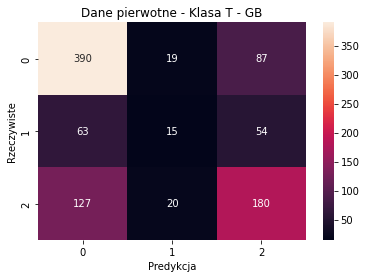

In [7]:

ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, fmt='g')

ax.set_title('Dane pierwotne - Klasa T - GB')
plt.ylabel('Rzeczywiste')
plt.xlabel('Predykcja')
plt.show()


In [20]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

precision = precision_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'],  average='macro')
recall = recall_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'],  average='macro')
f1score=f1_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], average='macro')
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1score: %.3f' % f1score)

Recall: 0.483
Precision: 0.504
F1score: 0.481
